# Instructions

**Using Python (Jupyter Note), solve the following problems.**

1.  **Upload the .ipyjn file (practice1_name_student.ipynb)**

2.  **Write an individual report including and explaining the results of
    the computation and the plots of the figures.**


## Problem 1

Compute the variations of the Right Ascension of the Ascending
 Node (RAAN) and the Argument of the Perigee (w) due to the effects
 of the asymmetry of the earth, and the perturbations associated with
 the moon and the sun for the following orbits:

| Name/Type of the orbit | a (Km) | eccentricity | i (º) |
|------------------------|--------|--------------|-------|
| Shuttle                | 6700   | 0            | 28    |
| Sun Synchronous        | 6728   | 0            | 98.85 |
| GPS                    | 26.600 | 0            | 60    |
| Molniya                | 26600  | 0.75         | 63.4  |
| GEO                    | 42160  | 0            | 0     |


## Resolution of Problem 1


<img src="https://www.dropbox.com/s/mp0p312eyhaujth/Keplerian_elements.png?raw=1 " width="400" class="center" />
    

**RAAN($\Omega$)** = Right Ascension of the ascending node 

**AP($\omega$)** = Argument of the Perigee

List of parameters:

* **a** semimajor axis in Km
* **inclination** = orbital inclination
* **n** = number of orbit revolutions per day
* **RAAN_effect(sun,moon,nonspherical earth)_variation** = precession of the Right Ascension in degrees/day
* **AP_effect(sun,moon,nonspherical earth)_variation** = precession of the Argument of Perigee in degrees/day

### Third-Body Perturbations

The gravitational forces ofthe Sun and the Moon cause periodic variations in all of the orbital elements, but only the right ascension ofthe ascending node, argument of perigee, and mean anomaly experience secular variations. These secular variations arisefromagyroscopicprecessionoftheorbitabouttheeclipticpole.Thesecularvari- ation in mean anomaly is much smaller than the mean motion and has little effect on the orbit; however, the secular variationS in right ascension ofthe ascending node and argument ofperigee are important, especially for high-altitude orbits.

For nearly circular orbits, $e^2$ is almost zero and the resulting error is o f the order $e^2$. In this case, the equations for the secular rates of change resulting from the Sun and Moon are:

1. **Right ascension of the ascending node**:

$\dot{\Omega}_{M O O N}=-0.00338(\cos i) / n$ \
$\dot{\Omega}_{S U N}=-0.00154(\cos i) / n$

2. **Argument of perigee**:

$\dot{\boldsymbol{\omega}}_{M O O N}=0.00169\left(4-5 \sin ^{2} i\right) / n$ \
$\dot{\boldsymbol{\omega}}_{S U N}=0.00077\left(4-5 \sin ^{2} i\right) / n$

### Perturbations Because of a Nonspherical Earth

When developing the two-body equations o f motion, we assumed the Earth has a spherically symmetric mass distnbution. In fact, the Earth has a bulge at the equator, a slight pear shape, and flattening at the poles. We can find a satellite's acceleration by taking the gradient of the gravitational potential function, $\Phi$. One widely used form ofthe geopotential function is:

$\Phi=(\mu / r)\left[1-\sum_{n=2}^{\infty} \mathrm{J}_{\mathrm{n}}\left(\mathrm{R}_{\mathrm{E}} / r\right)^{n} P_{n}(\sin L)\right]$

where $\mu =GM$ is Earth's gravitational constant, $R_E$ is Earth's equatorial radius, $P_n$ are Legendre polynomials, $L$ is geocentric latitude, and $J_n$ are dimensionless geopotential coefficients of which the first are:

$J_2 = 0.00108263$ \
$J_3 = 0.00000254$ \
$J_4 = 0.00000161$ 

This form of the geopotential function depends on latitude, and we call the geopotential coefficients, $J_n$, *zonal coefficients*.

The dominant effects, however, are secular variations in right ascension of the ascending node and argument of perigee because of the Earth's oblateness, represented by the $J_2$ term in the geopotential expansion. The rates of change of $\Omega$ and $\omega$ due to $J_2$ are:


$\dot{\Omega}_{J_2}=-2.06474 \times 10^{14} a^{-7/2}(\cos i)(1-e^2)^{-2}$ \
$\dot{\omega}_{J_2}=-1.03237 \times 10^{14} a^{-7/2}(4-5\sin^{2} i)(1-e^2)^{-2}$ 




In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import sys


a = np.array([6700, 6728, 26600, 26600, 42160],dtype=float)
e = np.array([0, 0, 0, 0.75, 0])
i = np.array([28, 96.85, 60, 63.4, 0])

mu = 398600 #G*M
T0 = 2*math.pi* (((a[0]**3))/mu)**0.5 #Se usa para el calculo de n
n0 = 24 *60 *60/T0
T1 = 2*math.pi* (((a[1]**3))/mu)**0.5 
n1 = 24 *60 *60/T1
T2 = 2*math.pi* (((a[2]**3))/mu)**0.5 
n2 = 24 *60 *60/T2
T3 = 2*math.pi* (((a[3]**3))/mu)**0.5 
n3 = 24 *60 *60/T3
T4 = 2*math.pi* (((a[4]**3))/mu)**0.5 
n4 = 24 *60 *60/T4

n = np.array([n0  , n1  , n2  , n3 , n4 ])

RAANmoon0 =-(0.00338 *(math.cos (i[0]*2*math.pi/360)))/n[0]
RAANmoon1 =-(0.00338 *(math.cos (i[1]*2*math.pi/360)))/n[1]
RAANmoon2 =-(0.00338 *(math.cos (i[2]*2*math.pi/360)))/n[2]
RAANmoon3 =-(0.00338 *(math.cos (i[3]*2*math.pi/360)))/n[3]
RAANmoon4 =-(0.00338 *(math.cos (i[4]*2*math.pi/360)))/n[4]
RAANmoon = [RAANmoon0, RAANmoon1, RAANmoon2, RAANmoon3, RAANmoon4]
RAANsun0 = -(0.00154* ( math.cos(i[0]*2*math.pi/360))/n[0])
RAANsun1 = -(0.00154* ( math.cos(i[1]*2*math.pi/360))/n[1])
RAANsun2 = -(0.00154* ( math.cos(i[2]*2*math.pi/360))/n[2])
RAANsun3 = -(0.00154* ( math.cos(i[3]*2*math.pi/360))/n[3])
RAANsun4 = -(0.00154* ( math.cos(i[4]*2*math.pi/360))/n[4])
RAANsun = [RAANsun0, RAANsun1, RAANsun2 ,RAANsun3 ,RAANsun4]
APmoon0 = 0.00169*(4-5*(math.sin(i[0]*2*math.pi/360)*(math.sin(i[0]*2*math.pi/360))))/n[0]
APmoon1 = 0.00169*(4-5*(math.sin(i[1]*2*math.pi/360)*(math.sin(i[1]*2*math.pi/360))))/n[1]
APmoon2 = 0.00169*(4-5*(math.sin(i[2]*2*math.pi/360)*(math.sin(i[2]*2*math.pi/360))))/n[2]
APmoon3 = 0.00169*(4-5*(math.sin(i[3]*2*math.pi/360)*(math.sin(i[3]*2*math.pi/360))))/n[3]
APmoon4 = 0.00169*(4-5*(math.sin(i[4]*2*math.pi/360)*(math.sin(i[4]*2*math.pi/360))))/n[4]
APmoon = [APmoon0, APmoon1, APmoon2, APmoon3, APmoon4 ]
APsun0 = 0.00077*(4-5*(math.sin(i[0]*2*math.pi/360)*(math.sin(i[0]*2*math.pi/360))))/n[0]
APsun1 = 0.00077*(4-5*(math.sin(i[1]*2*math.pi/360)*(math.sin(i[1]*2*math.pi/360))))/n[1]
APsun2 = 0.00077*(4-5*(math.sin(i[2]*2*math.pi/360)*(math.sin(i[2]*2*math.pi/360))))/n[2]
APsun3 = 0.00077*(4-5*(math.sin(i[3]*2*math.pi/360)*(math.sin(i[3]*2*math.pi/360))))/n[3]
APsun4 = 0.00077*(4-5*(math.sin(i[4]*2*math.pi/360)*(math.sin(i[4]*2*math.pi/360))))/n[4]
APsun = [APsun0, APsun1, APsun2, APsun3, APsun4]
RAANj20= (-2.06474 * 10**14) *(a[0])**(-3.5)* math.cos(i[0]*2*math.pi/360)*(1-e[0]*e[0])**-2
RAANj21= (-2.06474 * 10**14) *(a[1])**(-3.5)* math.cos(i[1]*2*math.pi/360)*(1-e[1]*e[1])**-2
RAANj22= (-2.06474 * 10**14) *(a[2])**(-3.5)* math.cos(i[2]*2*math.pi/360)*(1-e[2]*e[2])**-2
RAANj23= (-2.06474 * 10**14) *(a[3])**(-3.5)* math.cos(i[3]*2*math.pi/360)*(1-e[3]*e[3])**-2
RAANj24= (-2.06474 * 10**14) *(a[4])**(-3.5)* math.cos(i[4]*2*math.pi/360)*(1-e[4]*e[4])**-2
RAANj2 =[RAANj20, RAANj21, RAANj22, RAANj23, RAANj24]
APj20= (-1.03237*10**14) *(a[0])**(-3.5)* (4-5*(math.sin(i[0]*2*math.pi/360)**2))* (1-e[0]*e[0])**-2
APj21= (-1.03237*10**14) *(a[1])**(-3.5)* (4-5*(math.sin(i[1]*2*math.pi/360)**2))* (1-e[1]*e[1])**-2
APj22= (-1.03237*10**14) *(a[2])**(-3.5)* (4-5*(math.sin(i[2]*2*math.pi/360)**2))* (1-e[2]*e[2])**-2
APj23= (-1.03237*10**14) *(a[3])**(-3.5)* (4-5*(math.sin(i[3]*2*math.pi/360)**2))* (1-e[3]*e[3])**-2
APj24= (-1.03237*10**14) *(a[4])**(-3.5)* (4-5*(math.sin(i[4]*2*math.pi/360)**2))* (1-e[4]*e[4])**-2
APj2 = [APj20,APj21, APj22, APj23, APj24 ]

print ("n: Revolutions per day=")
print(n)
print ("           Shuttle         " "     Sun Synchronous       "   "       GPS            "  "       Molniya           " "        GEO            ")
print(f'RAANmoon: {RAANmoon}')
print(f'RAANsun:{RAANsun}')
print(f'APmoon{APmoon}')
print(f'APsun:{APsun}')
print(f'RAANj2:{RAANj2}')
print(f'APj2:{APj2}')

n: Revolutions per day=
[15.83034272 15.73162361  2.00115195  2.00115195  1.00288611]
           Shuttle              Sun Synchronous              GPS                   Molniya                   GEO            
RAANmoon: [-0.0001885216837459469, 2.562571591564152e-05, -0.0008445135814094973, -0.000756277261758738, -0.0033702730086591494]
RAANsun:[-8.589449496117108e-05, 1.1675622044404715e-05, -0.0003847783773285875, -0.0003445760305054605, -0.0015355681755429259]
APmoon[0.0003093799107049242, -9.978595157854695e-05, 0.00021112839535237466, 2.0614607862409363e-06, 0.006740546017318299]
APsun:[0.00014096007765845658, -4.5464605157089435e-05, 9.619459433214702e-05, 9.392454469855154e-07, 0.0030711363510858517]
RAANj2:[-7.40522892534148, 0.9858192305677231, -0.03363176405370305, -0.15735043129568443, -0.013418787136389327]
APj2:[-12.152602385829924, 3.8387575328807593, -0.008407941013425776, -0.00042890585267606624, -0.026837574272778653]


## Problem 2

Consider that the mass of the earth is *M=5.974×10^24 Kg* and its
radium is *R*=6378.144 Km. Consider a satellite orbiting in a parking
circular orbit of 350 Km of height.

<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

1.  Compute the velocity of the satellite in the parking orbit.

In a point of the circular trajectory is applied an impulse with a tangential velocity of ∆*v* 

2.  Compute the required impulse ∆*v* necessary to reach a parabolic orbit. 

3.  Plot the trajectories described by the satellite for impulses of 0
    0.25∆*vp*, 0.50∆*vp*, 0.75∆*vp*, 1.00∆*vp*, y 1.25∆*vp*.

It is planned to use an elliptical transfer orbit to transfer the
satellite to a geostationary orbit.

4.  Considering that the average solar year has a period of 365.2422
    days compute the distance and height of the geostationary orbit. *(Tenemos que calcular el dia sinodico, hay que calcular el poco menos q rota la tierra en un dia)*

5.  Compute the required momentum (∆*v) necessary to reach in the apogee the GEO orbit. 

6.  Plot the transfer orbit.

7.  Plot the height and velocity marking the apogee and the perigee.

8.  Compute the ∆v required to inject the satellite in the final geostationary orbit.

9.  Describe qualitatively the operations needed for this orbital transfer.



## Resolution of Problem 2

1.- **Compute the velocity of the satellite in the parking orbit.**

In [ ]:
G = 6.67*10**-11
M = 5.974*10**24
Radio = 6378.144*10**3
r = 350*10**3
distancia = Radio + r
velocidad = ((M*G/distancia)**0.5)
print (f'Velocidad: {velocidad /1000:.3f} Km/s')

Velocidad: 7.696 Km/s


2.  **Compute the required impulse ∆*v* necessary to reach a parabolic orbit**

In [ ]:
G = 6.67*10**-11
M = 5.974*10**24
Radio = 6378.144*10**3
r =  350*10**3
distancia = Radio + r
v1 = ((2*G*M)/distancia)**0.5 
v2 = ((G*M)/distancia)**0.5 
deltav= v1-v2
print (f'Delta v: {deltav /1000:.3f} Km/s')

Delta v: 3.188 Km/s


3.  **Plot the trajectories described by the satellite for impulses of 0
    0.25∆*vp*, 0.50∆*vp*, 0.75∆*vp*, 1.00∆*vp*, y 1.25∆*vp*.**

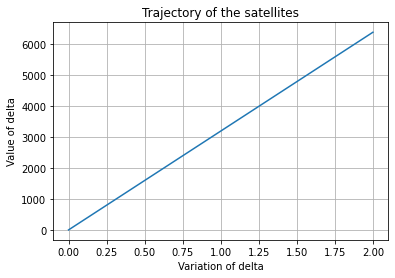

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pylab import * 

G = 6.67*10**-11
M = 5.974*10**24
R = 6378.144*10**3
r =  350*10**3
distancia = R + r
v1 = ((2*G*M)/distancia)**0.5 
v2 = ((G*M)/distancia)**0.5 
delta =v1-v2

x = np.linspace(0, 2, 20)

y = np.linspace (0,delta*2, 20)

fig, ax = plt.subplots()
#Creamos la Grafica
ax.plot(x, y)
plt.xlabel('Variation of delta')
plt.ylabel('Value of delta')
plt.title("Trajectory of the satellites")
plt.grid()
plt.show()

**Plot the trajectories described by the satellite with eccentricities = 0, 0.25, 0.5, 0.75**

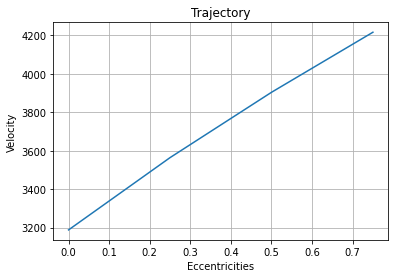

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pylab import * 

G = 6.67*10**-11
M = 5.974*10**24
R = 6378.144*10**3
r =  350*10**3
distancia = R + r
x= np.linspace(0, 0.75, 4)
exc =np.array([0, 0.25, 0.5, 0.75])
vexc2= ((1+exc)*G*M/distancia)**0.5
vexc1=   (((1+exc)*2*G*M)/distancia)**0.5 
deltaex = vexc1-vexc2 #excentricidad 0 da el valor de delta del ejercicio anterior y luego decae 

fig, ax = plt.subplots()
plt.title('Trajectory')
ax.plot(x, deltaex)
plt.ylabel('Velocity')
plt.xlabel('Eccentricities')
plt.grid()
plt.show()

**4.  Considering that the average solar year has a period of 365.2422
    days compute the distance and height of the geostationary orbit.**

In [ ]:
dia = 360
diasolar = 360.9856
distancia = dia/diasolar
distanciahoras = distancia *24
print (f'Sideral time: {distanciahoras:.3f} hours')

Sideral time: 23.934 hours


In [ ]:
G = 6.67*10**-11
M = 5.974*10**24
Radio = 6378.144*10**3
vangular = 7.29*10**-5
geo = (((G*M)/vangular**2)**(1/3))-Radio
print (f'height Geo: {geo /1000:.3f} Km')

height Geo: 35789.435 Km


**5.  Compute the required momentum (∆*v) necessary to reach in the apogee the GEO orbit.**

In [ ]:
G = 6.67*10**-11 
M = 5.974*10**24 
Radio = 6378.144*10**3
r = 350*10**3 
v2 = (G*M/( Radio+r))**0.5 
r1 = Radio +r 
r2= 35785*10**3 +Radio 
v1= ((2*G*M*r2)/(r1*(r1+r2)))**0.5 
delta= v1-v2
print (f'Delta v apogee: {delta /1000:.3f} Km/s')

10106.799251532344 7695.695707928714
Delta v apogee: 2.411 Km/s


**6.  Plot the transfer orbit**

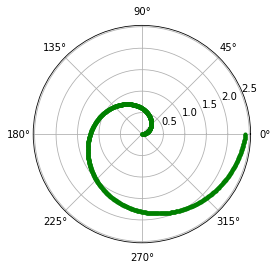

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pylab import * 

G = 6.67*10**-11
M = 5.974*10**24
R = 6378.144*10**3
r = 350*10**3
v2 = (G*M/( R+r))**0.5
r1 = R +r
r2= 35785*10**3 +R
v1= ((2*G*M*r2)/(r1*(r1+r2)))**0.5
delta= (v1-v2)/1000
theta = np.linspace(0, 2*np.pi, 1000) 
t  = np.linspace(0*delta, delta, 1000)

fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")
ax.plot(theta,t, 'g.')

plt.show()

**7.  Plot the height and velocity marking the apogee and the perigee.**

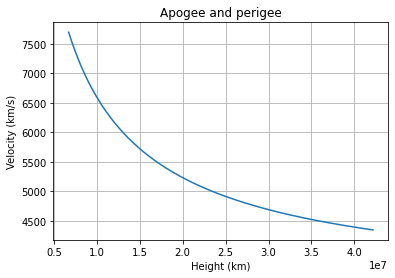

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from pylab import * 

G = 6.67*10**-11
M = 5.974*10**24
R = 6378.144*10**3
r =  350*10**3

vangular = 7.29*10**-5
geo = (((G*M)/vangular**2)**(1/3))-R

r1=r+R
r2=geo+R
e= np.linspace(0,1,1000)
distancia= np.linspace(r1,r2,1000)
v1= ((1+e)*G*M/distancia)**0.5 


fig, ax = plt.subplots()

ax.plot(distancia,v1)
plt.xlabel('Height (km)')
plt.ylabel('Velocity (km/s)')
plt.title("Apogee and perigee")
plt.grid()
plt.show()

**8.  Compute the ∆v required to inject the satellite in the final geostationary orbit.**



In [ ]:
G = 6.67*10**-11
M = 5.974*10**24
Radio = 6378.144*10**3
r = 350*10**3
r1 = Radio +r
r2= 35785*10**3 +Radio
v1 = ((2*G*M*r1)/(r2*(r1+r2)))**0.5
v2 = (G*M/( r2))**0.5
deltav = v2- v1
print (f'Delta v: {deltav /1000:.3f} Km/s')

Delta v: 1.461 Km/s


**9.  Describe qualitatively the operations needed for this orbital transfer.**



Tenemos un sátelite artificial y queremos que alcance una orbita geoestacionaria

In [ ]:
r= 350000 #altura del satelite
h = 35770000 #orbita
M = 5.98 *10**24 #masa tierra
G = 6.67*10**-11 #constante de gravitacion universal
R =6370000 #radio tierra

#Transformamos las alturas de las órbitas en distancias al centro de la Tierra

r1= r+R
r2= h +R


deltaA = (((G*M)/r1)**0.5) *(0.4142) #esto ultimo es raiz de dos menos uno (poner ecuaciones enteras)
print (f'Delta A: {deltaA :.3f} m/s')


deltaB = (((G*M)/r2) *(3-2.82*(r1/r2)**0.5))**0.5
print (f'Delta B: {deltaB :.3f} m/s')


Delta A: 3191.089 m/s
Delta B: 4211.498 m/s
